In [12]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/IHI

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/IHI


In [2]:
import numpy as np
import pandas as pd
import plotly
import os

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df1 = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
df2 = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df3 = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
 

print('df1 shape is: {}'.format(df1.shape))
print('df2 shape is: {}'.format(df2.shape))
print('df3 shape is: {}'.format(df3.shape))

df1 shape is: (253680, 22)
df2 shape is: (70692, 22)
df3 shape is: (253680, 22)


In [ ]:
print("Dataset with distinction between non-diabetes, pre-diabetic and diabetic: \n",df1['Diabetes_012'].value_counts(),"\n")
print("Balanced Dataset with binary distinction between non-diabetes and pre-diabetic or diabetic: \n",df2['Diabetes_binary'].value_counts(),"\n")
print("Unbalanced Dataset with binary distinction between non-diabetes and pre-diabetic or diabetic distinction: \n",df3['Diabetes_binary'].value_counts(),"\n")

Dataset with distinction between non-diabetes, pre-diabetic and diabetic: 
 0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_012, dtype: int64 

Balanced Dataset with binary distinction between non-diabetes and pre-diabetic or diabetic: 
 0.0    35346
1.0    35346
Name: Diabetes_binary, dtype: int64 

Unbalanced Dataset with binary distinction between non-diabetes and pre-diabetic or diabetic distinction: 
 0.0    218334
1.0     35346
Name: Diabetes_binary, dtype: int64 



We will be going ahead with the Unbalanced datasets which have higher number of records for our usecase

In [ ]:
df1.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
df1.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [ ]:
# Duplicates
df1[df1.duplicated()].shape[0]

23899

In [ ]:
df1 = df1.drop_duplicates()
print(df1.shape)
df1.head()

(229781, 22)


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
import plotly.express as px
df = df1.groupby("Diabetes_012", as_index= False).agg({"HighBP":"count"}).rename( columns = {"HighBP":"count"})
df['Diabetes_012'] = df['Diabetes_012'].apply(str)
fig = px.bar(df, x="Diabetes_012", y="count", color = "Diabetes_012", width = 600, title="Class Distribution in Dataset", text_auto=True)
fig.show()

In [ ]:
df['pct'] = (df['count']/df['count'].sum())*100
df

,Diabetes_012,count,pct
0,0.0,190055,82.711364
1,1.0,4629,2.014527
2,2.0,35097,15.274109


In [ ]:
190055/229781

0.8271136429904996

In [ ]:
bool_vars = (df1.nunique()[df1.nunique() == 2]
                .index)
num_vars = [var for var in df1.columns if var not in bool_vars and var != 'Diabetes_012']

In [ ]:
bool_vars

Index(['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex'],
      dtype='object')

In [ ]:
df1['Sex'].value_counts(1)

0.0    0.560769
1.0    0.439231
Name: Sex, dtype: float64

In [ ]:
df1['Fruits'].value_counts(1)

1.0    0.612966
0.0    0.387034
Name: Fruits, dtype: float64

In [ ]:
df1['Veggies'].value_counts(1)

1.0    0.794813
0.0    0.205187
Name: Veggies, dtype: float64

In [ ]:
def analyse_cat(var):
  df = df1.groupby(['Diabetes_012',var],as_index= False).agg({"BMI":"count"}).rename( columns = {"BMI":"count"}) #unstack().iloc[:,::-1].reset_index()
  df['pct'] = df['count']/df.groupby("Diabetes_012")['count'].transform("sum")
  # df = df1.groupby(["Diabetes_012",var], as_index= False).agg({"BMI":"count"}).rename( columns = {"BMI":"count"})
  df['Diabetes_012'] = df['Diabetes_012'].apply(str)
  df[var] = df[var].apply(str)
  fig = px.bar(df, y="Diabetes_012", x="pct", color = var, width = 600, height = 400, title="Class Distribution in Dataset across "+var, text_auto=True, orientation='h')
  fig.show()
  # return df


In [ ]:
analyse_cat('Age')

In [ ]:
for var in bool_vars:
  analyse_cat(var)

In [ ]:
# Describe columns

# Age: 13-level age category (_AGEG5YR see codebook)

# 1 = 18-24 / 2 = 25-29 / 3 = 30-34 / 4 = 35-39 / 5 = 40-44 / 6 = 45-49 / 7 = 50-54 / 8 = 55-59 / 9 = 60-64 / 10 = 65-69 / 11 = 70-74 / 12 = 75-79 / 13 = 80 or older
df1['Age'].value_counts(1)

9.0     0.129410
10.0    0.126938
8.0     0.118813
7.0     0.100705
11.0    0.095922
6.0     0.075285
13.0    0.073170
12.0    0.066994
5.0     0.061145
4.0     0.053242
3.0     0.043628
2.0     0.030760
1.0     0.023988
Name: Age, dtype: float64

In [ ]:
0.129410 + 0.126938 +0.118813 +0.100705+0.095922

0.571788

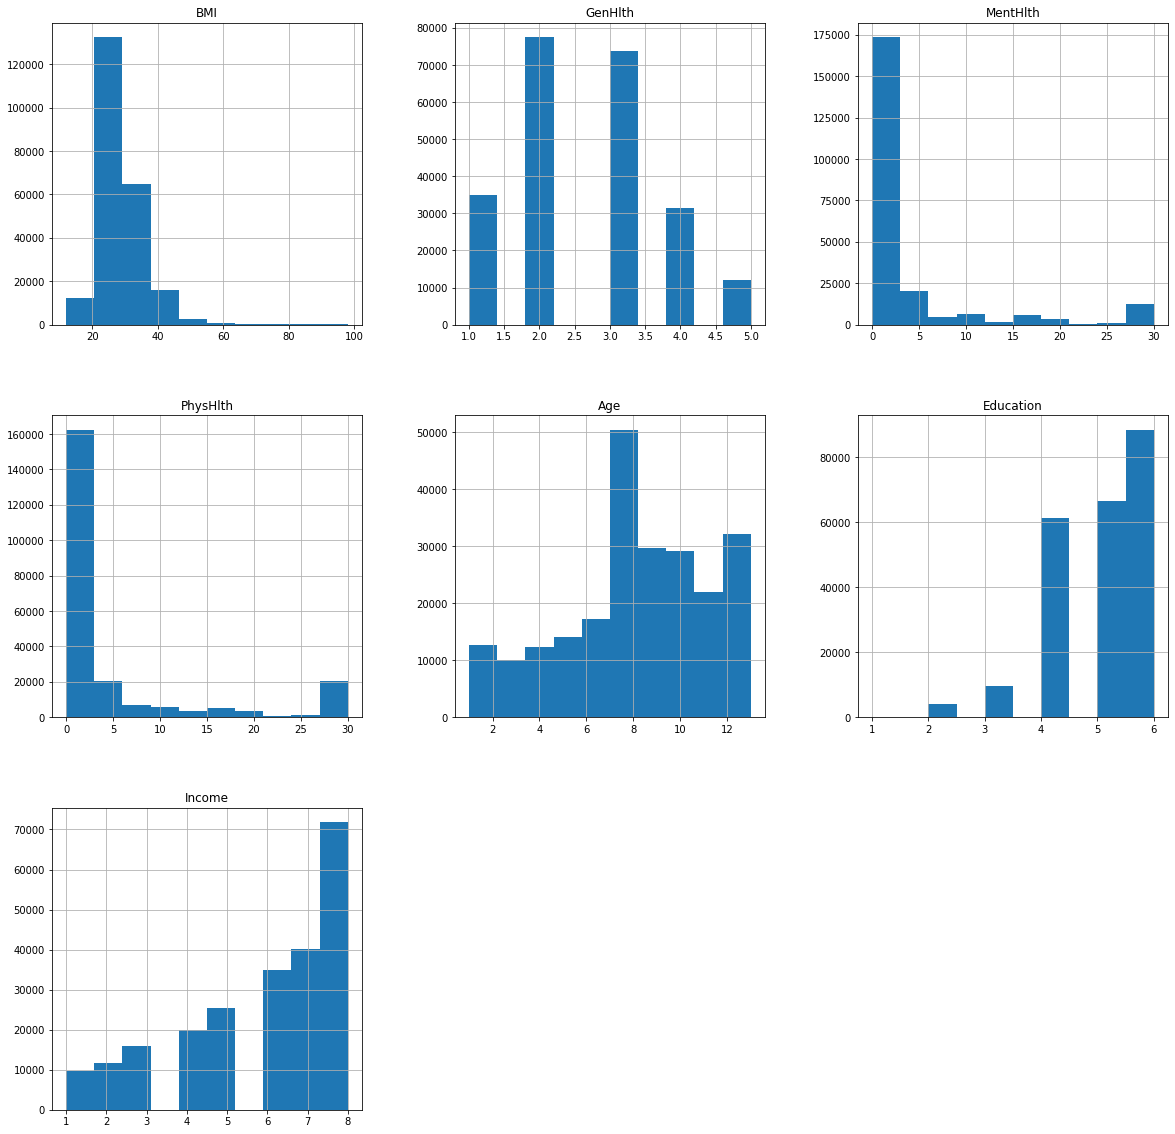

In [ ]:
df1[num_vars].hist(figsize=(20,20));

In [ ]:
def analyse_num(var):
  df = df1.groupby(['Diabetes_012',var],as_index= False).agg({"HighBP":"count"}).rename( columns = {"HighBP":"count"}) #unstack().iloc[:,::-1].reset_index()
  df['pct'] = df['count']/df.groupby("Diabetes_012")['count'].transform("sum")
  # df = df1.groupby(["Diabetes_012",var], as_index= False).agg({"BMI":"count"}).rename( columns = {"BMI":"count"})
  df['Diabetes_012'] = df['Diabetes_012'].apply(str)
  df[var] = df[var].apply(str)
  fig = px.bar(df, y="Diabetes_012", x="pct", color = var, width = 600, height = 400, title="Class Distribution in Dataset across "+var, text_auto=True, orientation='h')
  fig.show()
  # return df


In [ ]:
for var in num_vars:
  analyse_num(var)

In [ ]:
# Writing out cleaned data to new CSV
df1.to_csv(os.getcwd()+'/cleaned_diabetes_012_health_indicators_BRFSS2015.csv',index=False)

Text(0.5, 1.0, 'Correlation of features')

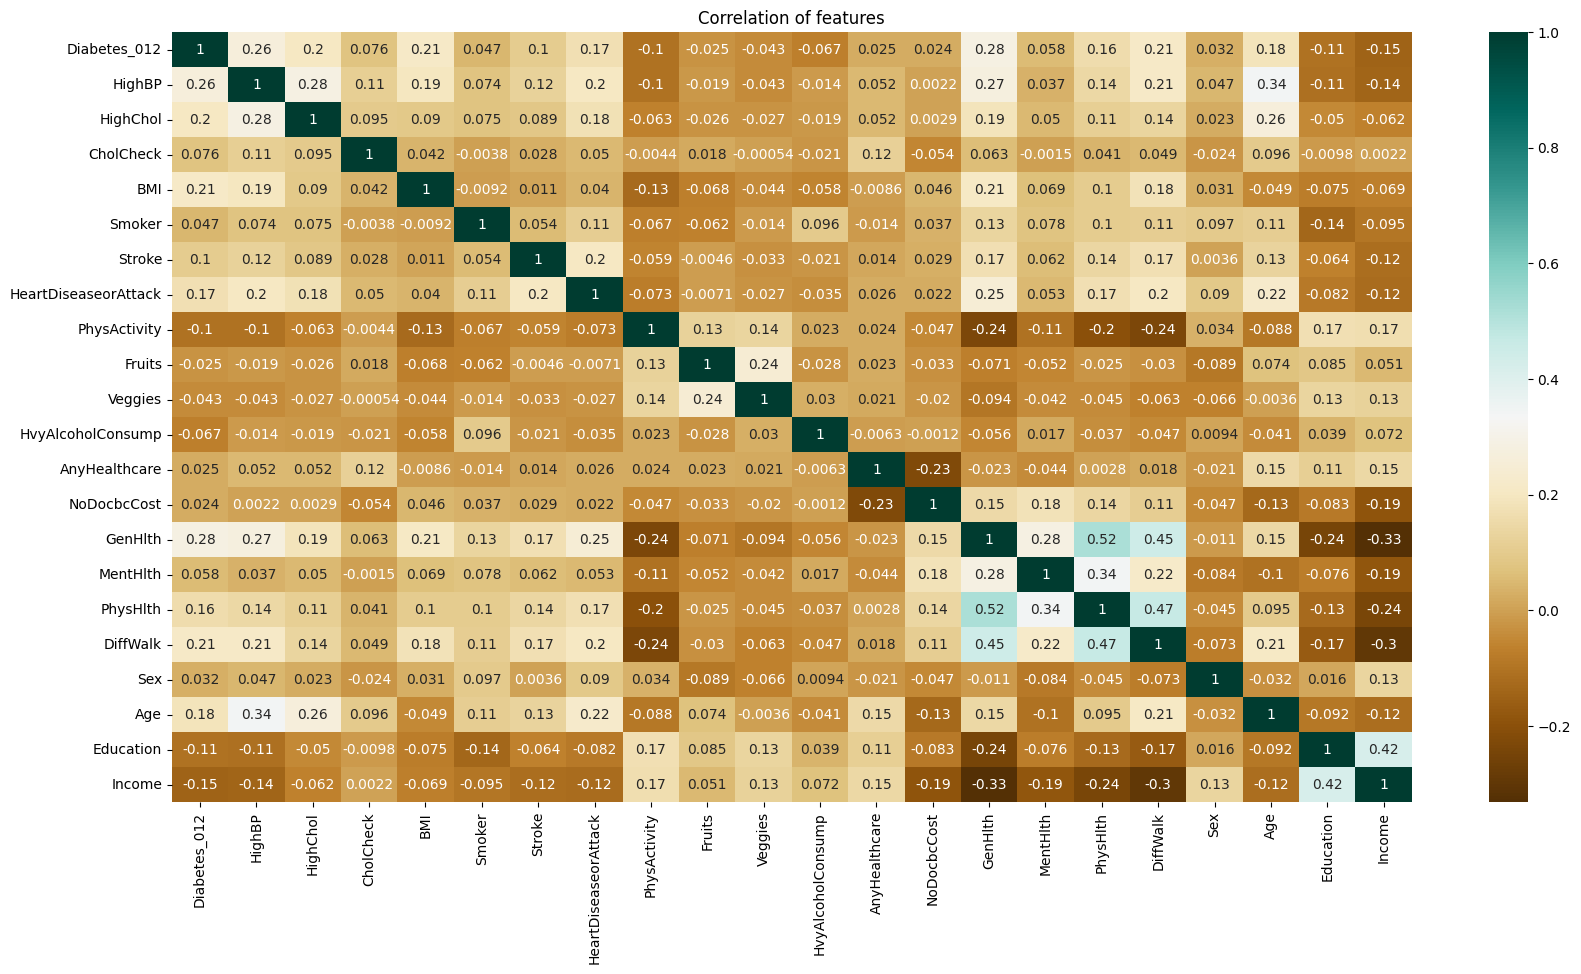

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20,10))
sns.heatmap(df1.corr(),annot=True , cmap ='BrBG' )
plt.title("Correlation of features")